In [2]:
import pandas as pd
import numpy as np

In [3]:
seqA = pd.read_csv('../data/seqA.csv')
seqB = pd.read_csv('../data/seqB.csv')
ChromBPNet_lfc = pd.read_csv('../data/MPRAC24_lfc_allmodels.csv')

In [4]:
print(ChromBPNet_lfc.info())
print(ChromBPNet_lfc.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13139 entries, 0 to 13138
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13139 non-null  int64  
 1   lfc          13139 non-null  float64
 2   abs_lfc      13139 non-null  float64
 3   A_scores     13139 non-null  float64
 4   B_scores     13139 non-null  float64
 5   max_alleles  13139 non-null  float64
 6   jsd          13139 non-null  float64
 7   metadata     13139 non-null  object 
 8   NN_cluster   13139 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 924.0+ KB
None
    Unnamed: 0       lfc   abs_lfc    A_scores    B_scores  max_alleles  \
0            0 -0.024933  0.024933  125.985677  122.883366   125.985677   
1            1 -0.004944  0.004944   96.135090   95.660938    96.135090   
2            2  0.013987  0.013987  525.229529  532.627407   532.627407   
3            3 -0.097180  0.097180  140.757864  127.722690   

In [5]:
mpra = pd.read_csv('../data/220518MPRA.csv')
mpra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5255 entries, 0 to 5254
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   oligo_id               5255 non-null   object 
 1   vars                   5255 non-null   object 
 2   oligo_id2              5255 non-null   object 
 3   rsid                   5255 non-null   object 
 4   snp_type               5255 non-null   object 
 5   snp_type2              5255 non-null   object 
 6   oligo_group            5255 non-null   object 
 7   seq                    5255 non-null   object 
 8   seq2                   5255 non-null   object 
 9   rna_1_var1             5255 non-null   int64  
 10  rna_2_var1             5255 non-null   int64  
 11  rna_3_var1             5255 non-null   int64  
 12  dna_1_var1             5255 non-null   int64  
 13  dna_2_var1             5255 non-null   int64  
 14  dna_3_var1             5255 non-null   int64  
 15  rna_

In [6]:
mpra_filtered = pd.DataFrame()
mpra_filtered['seq1'] = mpra['seq']
mpra_filtered['seq2'] = mpra['seq2']
mpra_filtered['lfc'] = mpra['log2FoldChange_allele']
mpra_filtered['abslfc'] = mpra_filtered['lfc'].abs()
mpra_filtered['metadata'] = mpra['vars']
mpra_filtered['rsid'] = mpra['rsid']
mpra_filtered['region'] = mpra['oligo_group']
mpra_filtered.head(20)
regions = ("stdWin", "optWin")
mpra_peaks = mpra_filtered[mpra_filtered['region'].isin(regions)]
mpra_peaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 0 to 5253
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq1      1877 non-null   object 
 1   seq2      1877 non-null   object 
 2   lfc       1877 non-null   float64
 3   abslfc    1877 non-null   float64
 4   metadata  1877 non-null   object 
 5   rsid      1877 non-null   object 
 6   region    1877 non-null   object 
dtypes: float64(2), object(5)
memory usage: 117.3+ KB


In [7]:
mpra_peaks.sort_values('metadata', ascending=False, inplace=True)
mpra_peaks_reindex = mpra_peaks.reset_index(drop=True)

<ipython-input-7-d6f3f65d094f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpra_peaks.sort_values('metadata', ascending=False, inplace=True)


In [8]:
ChromBPNet_lfc.sort_values('metadata', ascending=False, inplace=True)
ChromBPNet_lfc_reindex = ChromBPNet_lfc.reset_index(drop=True)

In [9]:
C1 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C1'].reset_index(drop=True)
C2 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C2'].reset_index(drop=True)
C5 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C5'].reset_index(drop=True)
C8 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C8'].reset_index(drop=True)
C13 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C13'].reset_index(drop=True)
C19 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C19'].reset_index(drop=True)
C24 = ChromBPNet_lfc_reindex[ChromBPNet_lfc_reindex['NN_cluster'] == 'C24'].reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.026262     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.001479     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.075855     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.102118     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.121518     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

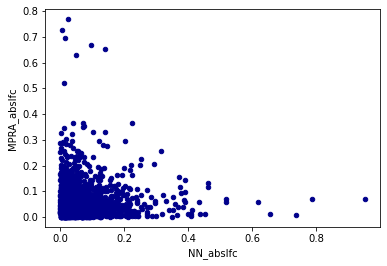

In [12]:
resultsC1 = pd.DataFrame()
resultsC1['NN_abslfc'] = C1['abs_lfc']
resultsC1['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC1['NN_metadata'] = C1['metadata']
resultsC1['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC1.info())
print(resultsC1.head(100))
ax1 = resultsC1.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC1['NN_abslfc'].corr(resultsC1['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.062645     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.085313     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.052577     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.115221     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.042478     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

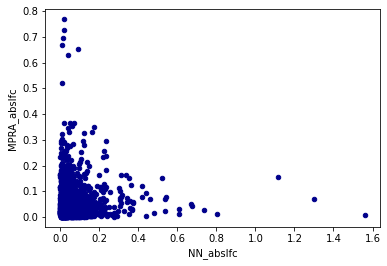

In [14]:
resultsC2 = pd.DataFrame()
resultsC2['NN_abslfc'] = C2['abs_lfc']
resultsC2['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC2['NN_metadata'] = C2['metadata']
resultsC2['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC2.info())
print(resultsC2.head(100))
ax1 = resultsC2.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC2['NN_abslfc'].corr(resultsC2['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.010683     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.013824     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.063508     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.052825     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.062677     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

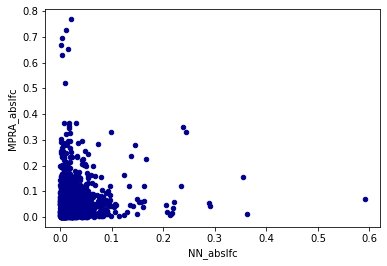

In [15]:
resultsC5 = pd.DataFrame()
resultsC5['NN_abslfc'] = C5['abs_lfc']
resultsC5['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC5['NN_metadata'] = C5['metadata']
resultsC5['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC5.info())
print(resultsC5.head(100))
ax1 = resultsC5.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC5['NN_abslfc'].corr(resultsC5['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.032915     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.033962     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.042245     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.075160     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.048933     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

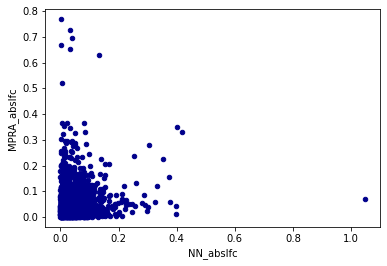

In [16]:
resultsC8 = pd.DataFrame()
resultsC8['NN_abslfc'] = C8['abs_lfc']
resultsC8['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC8['NN_metadata'] = C8['metadata']
resultsC8['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC8.info())
print(resultsC8.head(100))
ax1 = resultsC8.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC8['NN_abslfc'].corr(resultsC8['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.010868     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.002914     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.069008     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.079877     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.071468     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

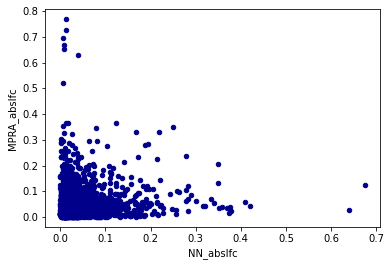

In [17]:
resultsC13 = pd.DataFrame()
resultsC13['NN_abslfc'] = C13['abs_lfc']
resultsC13['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC13['NN_metadata'] = C13['metadata']
resultsC13['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC13.info())
print(resultsC13.head(100))
ax1 = resultsC13.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC13['NN_abslfc'].corr(resultsC13['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.009183     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.003451     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.028706     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.037889     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.043477     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

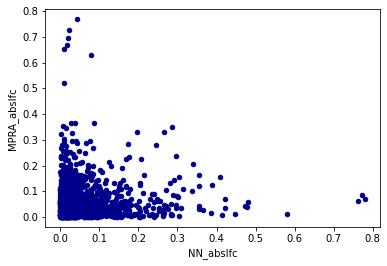

In [18]:
resultsC19 = pd.DataFrame()
resultsC19['NN_abslfc'] = C19['abs_lfc']
resultsC19['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC19['NN_metadata'] = C19['metadata']
resultsC19['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC19.info())
print(resultsC19.head(100))
ax1 = resultsC19.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC19['NN_abslfc'].corr(resultsC19['MPRA_abslfc']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NN_abslfc      1877 non-null   float64
 1   MPRA_abslfc    1877 non-null   float64
 2   NN_metadata    1877 non-null   object 
 3   MPRA_metadata  1877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 58.8+ KB
None
    NN_abslfc  MPRA_abslfc                                        NN_metadata  \
0    0.044269     0.024152  9_rs10207628_var_stdWin_A.9_rs10207628_var_std...   
1    0.022108     0.026611  9_rs10207628_var_optWin_A.9_rs10207628_var_opt...   
2    0.009665     0.029010  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
3    0.053934     0.054821  9_rs10207628_ref_stdWin_A.9_rs10207628_var_std...   
4    0.019160     0.027086  9_rs10207628_ref_optWin_A.9_rs10207628_var_opt...   
..        ...          ...                                                ...   
95   

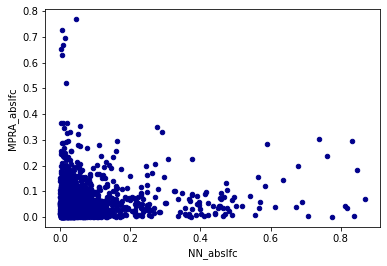

In [19]:
resultsC24 = pd.DataFrame()
resultsC24['NN_abslfc'] = C24['abs_lfc']
resultsC24['MPRA_abslfc'] = mpra_peaks_reindex['abslfc']
resultsC24['NN_metadata'] = C24['metadata']
resultsC24['MPRA_metadata'] = mpra_peaks_reindex['metadata']

print(resultsC24.info())
print(resultsC24.head(100))
ax1 = resultsC24.plot.scatter(x='NN_abslfc', y='MPRA_abslfc', c='DarkBlue')
print(resultsC24['NN_abslfc'].corr(resultsC24['MPRA_abslfc']))